###### Content under Creative Commons Attribution License CC BY 4.0, code under BSD 3 - Clause License © 2020 Andrea Mandanici, Marco Guarnera, Giuseppe Mandaglio, Giovanni Pirrotta.

# Moto di un proiettile

&nbsp;

Un oggetto viene lanciato con velocità iniziale $ v_0 = 6~m/s $. L'angolo che il vettore $ \vec{v}_0 $ forma con la direzione orizzontale è $ \theta_0 = \pi / 6 $.

Calcolare la gittata, il tempo di volo e la massima quota raggiunta.

<div id = "immagine">

<img src = "Immagini/Moto_proiettile_01.png" alt = "Immagine">

</div>

### Discussione del problema???

Trascurando la resistenza dell'aria e considerando che il moto avviene con accelerazione costante pari all'accelerazione di gravità $ \vec{g} $, si ottengono le equazioni che descrivono la posizione dell'oggetto, considerato come un **punto materiale**, in funzione del tempo. Da tali equazioni si possono ricavare le equazioni per:

* La **gittata**:

<div id = "colorbox">

$$ R = \dfrac{v_0^2}{g} \cdot \sin 2 \theta_0 $$

</div>

* Il **tempo di volo**:

<div id = "colorbox">

$$ t_{volo} = \dfrac{2 \cdot v_0 \cdot \sin \theta_0}{g} $$

</div>

* L' **altezza massima**:

<div id = "colorbox">

$$ h = \dfrac{(v_0 \cdot \sin \theta_0)^2}{g} $$

</div>

### Calcoli con il Python

Per eseguire i calcoli utilizziamo il modulo **numpy** e utilizziamo anche il modulo **matplotlib** per rappresentare graficamente le grandezze che caratterizzano il moto in questo esempio.

In [15]:
# Utilizzato per importare la libreria adoperata per rappresentare graficamente le grandezze.
import matplotlib.pyplot as plt
# Utilizzato per importare la libreria adoperata per funzioni matematiche.
import numpy as np


vi = 6 # Velocità iniziale in m/s.
theta0 = np.pi / 4 # Angolo tra il vettore velocità iniziale e la direzione orizzontale in radianti.
g = 9.8 # Accelerazione di gravità in m/s^2.
R = (vi ** 2) * np.sin(2 * theta0) / g # Gittata in m.
tv = 2 * vi * np.sin(theta0) / g # Tempo di volo in s.
h = ((vi * np.sin(theta0)) ** 2) / g # Altezza massima in m.

print()
print("Gittata = {0:0.3f} m \n".format(R))
print("Tempo di volo = {0:0.3f} s \n".format(tv))
print("Altezza massima = {0:0.3f} m \n".format(h))


Gittata = 3.673 m 

Tempo di volo = 0.866 s 

Altezza massima = 1.837 m 



### Studio del moto: equazioni orarie e traiettoria

Le equazioni orarie forniscono il valore di ciascuna delle coordinate del punto materiale in funzione del tempo. In questo caso:

<div id = "colorbox">

$$ x(t) = v_{0x} \cdot t $$

</div>

<div id = "colorbox">

$$ y(t) = (v_{0y} \cdot t) - (\dfrac{1}{2} \cdot g \cdot t^2) $$

</div>

Dove $ v_{0x} $ e $ v_{0y} $ sono le componenti del vettore velocità iniziale $ \vec{v}_0 $ rispetto agli assi cartesiani $ x $ e $ y $.

<div id = "colorbox">

$$ v_{0x} = v_0 \cdot \cos \theta_0 $$

</div>

<div id = "colorbox">

$$ v_{0y} = v_0 \cdot \sin \theta_0 $$

</div>

* Possiamo utilizzare le equazioni $ x(t) $ e $ y(t) $ come equazioni parametriche per la **traiettoria**.

* Infatti possiamo considerare un **array** di valori di $ t $ compresi tra l'istante iniziale $ t = 0 $ e un istante finale che per comodità scegliamo coincidente con $ t_v $, il *tempo di volo*.

    * Per generare l'array di valori distribuiti in modo lineare tra $ 0 $ e $ t_v $ utilizziamo la funzione **linspace()** del modulo **numpy**.

* Calcoliamo le coordinate $ x $ e $ y $ in corrispondenza a ciascuno dei valori di $ t $ compresi nell'array.

* Riportiamo in grafico i punti corripondenti alle coppie di coordinate $ x, y $ per ciascun valore di $ t $ per ottenere così il grafico della traiettoria.

     * E' importante che l'asse $ x $ e l'asse $ y $ abbiamo la stessa unità di misura e la stessa scala.

NameError: name 'v0' is not defined

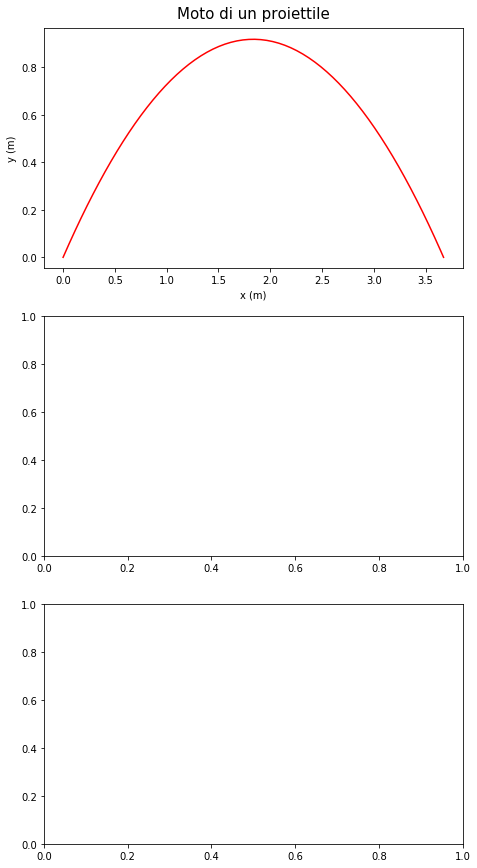

In [16]:
t = np.linspace(0, tv, 128)
x = vi * np.cos(theta0) * t
y = vi * np.sin(theta0) * t - 0.5 * g * t ** 2

print()
# Da controllare.
# Grafico
fig, axes = plt.subplots(3, figsize=(7.5, 15))
# Grafico 1.
axes[0].set_title('Moto di un proiettile', fontdict={'fontsize': 15}, pad=10)
axes[0].plot(x, y, color='red')
axes[0].set_xlabel('x (m)')
axes[0].set_ylabel('y (m)')
testo = '\n'.join((r'$v0=%.2fm/s$' % (v0, ), r'$ang=%.2f°$' % (np.degrees(ang), ), r'$R=%.2fm$' % (R, )))
axes[0].text(0.0725, 0.010, testo, fontdict={'fontsize': 10}, bbox=dict(facecolor='red'))
axes[0].grid(True)
#plt.show()

print()

plt.figure(2)
plt.plot(x, y)
plt.xlabel("$ x $ (m)")
plt.ylabel("$ y $ (m)")
plt.xlim(left = 0)
plt.ylim(bottom = 0)

plt.gca().set_aspect("equal", adjustable = "box") # This is important.

string = r"$ v_0 $ = {0:0.3f} m/s".format(v0) + "\n" + r"$ \theta_0 $ = {0:0.3f} deg".format(theta0 * 180 / np.pi)
plt.text(R / 2, 0, string, horizontalalignment = "center", verticalalignment = "bottom")
plt.title("Projectile motion - Trajectory")
plt.show()

### Dipendenza dall'angolo di lancio $ \theta_0 $

Consideriamo la traiettoria che si ottiene in corrispondenza a valori diversi dell'angolo di lancio $ \theta_0 $, mantenendo costante il modulo della velocità iniziale $ v_i $.

* Produciamo un array di valori di $ \theta_0 $ utilizzando la funzione **arange()** del modulo **numpy**.

* Riportiamo in grafico le traiettorie corrispondenti a tutti i valori di $ \theta_0 $.

In [ ]:
theta0deg = np.arange(10, 90, 5)
theta0 = theta0deg * np.pi / 180

fig = plt.figure(3, (8, 6))

plt.xlabel("$ x $ (m)")
plt.ylabel("$ y $ (m)")
plt.text(3.0, 1.50, r"$ v_0 $ = {0:0.1f} m/s".format(v0))

# Funzione.
for angle in theta0:
    tv = 2 * vi * np.sin(angle) / g
    t = np.linspace(0, tv, 128)
    x = vi * np.cos(angle) * t
    y = vi * np.sin(angle) * t - 0.5 * g * t ** 2
    plt.plot(x, y)
    plt.draw()

plt.gca().set_aspect("equal", adjustable = "box")
#plt.savefig("AllTrajectories.pdf")
print()
plt.show()

### Get a feel of

Cosa cambia al variare dell'angolo di lancio $ \theta_0 $?

* Tempo di volo.

* Gittata.

* Altezza massima.

> Angoli complementari (per esempio 30° e 60°) danno la stessa gittata
>> ma il tempo di volo e la quota massima sono diversi.

### Simulazione e previsione

Scegliendo di far variare l'angolo $ \theta_0 $ a passi di $ 1 grado $ si delinea una *curva inviluppo* che delimita la regione i cui punti <span style = "color:red"> non sono raggiunti da nessuna traiettoria </span>, qualunque sia l'angolo di lancio $ \theta_0 $, per una data velocità iniziale $ v_0 $.

Questa curva prende il nome di **parabola di sicurezza**, descritta dall'equazione:

<div id = "colorbox">

$$ y = \dfrac{v_0^2}{2g} - (\dfrac{1}{2} \cdot \dfrac{g}{v_0^2} \cdot x^2) $$

</div>

Nello script seguente produciamo un grafico contenente:

* Le varie traiettorie corrispondenti a valori di $ \theta_0 $ incrementati a passi di $ 1 grado $.

* La parabola di sicurezza.

In [ ]:
print()

theta0deg = np.arange(10, 90, 1)
theta0 = theta0deg * np.pi / 180

fig = plt.figure(4, (8, 6))

plt.xlabel("$ x $ (m)")
plt.ylabel("$ y $ (m)")
plt.text(3.0, 1.50, r"$ v_0 $ = {0:0.1f} m/s".format(vi))

# Funzione.
for angle in theta0:
    tv = 2 * vi * np.sin(angle) / g
    t = np.linspace(0, tv, 128)
    x = vi * np.cos(angle) * t
    y = vi * np.sin(angle) * t - 0.5 * g * t ** 2
    plt.plot(x, y)
    plt.draw()

plt.gca().set_aspect("equal", adjustable = "box")
#plt.savefig("AllTrajectories.pdf")

Rmax = R = (vi ** 2) / g # Gittata massima in m.
xx = np.linspace(0, Rmax, 180)
yy = vi * vi / (2 * g) - 0.5 * g * xx * xx / (vi * vi)
plt.plot(xx, yy, linewidth = 4)
plt.axhline(color = "gray")
plt.axvline(color = "gray")
plt.title("Parabola di sicurezza")

plt.show()

In [ ]:
# Utilizzato per importare la libreria adoperata per rappresentare graficamente le grandezze.
import matplotlib.pyplot as plt
# Utilizzato per importare la libreria adoperata per funzioni matematiche.
import numpy as np


vi = 6 # Velocità iniziale in m/s.
ang = np.arange(5, 90, 5)
angrad = np.radians(ang)
g = 9.8 # Accelerazione di gravità in m/s^2.

print()

# Grafico.
# Grafico 1.
fig, axes = plt.subplots(2, figsize=(10, 12.5))
axes[0].set_title('Moto di un proiettile', fontdict={'fontsize': 15}, pad=10)
axes[0].set_xlabel('x (m)')
axes[0].set_ylabel('y (m)')
axes[0].text(3, 1.5, r'$v_0$ = {0:0.1f} m/s'.format(v0), fontdict={'fontsize': 12.5}, bbox=dict(facecolor='red'))
for angle in angrad:
    print('Angolo di', np.degrees(angle), 'gradi')
    R = ((v0**2)/g)*(np.sin(2*angle)) # Gittata.
    print('Gittata:', R, 'm')
    t = 2*((v0*np.sin(angle))/g) # Tempo di volo.
    print('Tempo di volo:', t, 's')
    h = ((v0*np.sin(angle))**2)/2*g # Massima quota raggiunta.
    print('Massima quota raggiunta:', h, 'm')
    print()
    t1 = np.linspace(0, t, 128)
    x = v0*(np.cos(angle))*t1
    y = (v0*(np.sin(angle))*t1)-(0.5*g*(t1**2))
    axes[0].plot(x,y)
axes[0].grid(True)
#plt.show()

# Grafico 2.
axes[1].set_title('Parabola di sicurezza', fontdict={'fontsize': 15}, pad=10)
axes[1].set_xlabel('x (m)')
axes[1].set_ylabel('y (m)')
R = ((v0**2)/g)*(np.sin(2*1.48)) # Gittata.
x1 = np.linspace(0, R, 128)
y1 = ((v0**2)/(2*g))-((1/2)*(g/(v0**2))*(x**2))
axes[1].plot(x1,y1)
axes[1].grid(True)
#plt.show()

> Per eseguire il codice Python contenuto in questo **notebook** Jupyter, anche se Python e Jupyter non sono installati sulla macchina che stai adoperando, puoi utilizzare l'ambiente [**binder**](https://mybinder.org) online.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Darkaquon/Physics-with-Open-Source-Software/master?filepath=%2FNotebook%2FMoto_proiettile.ipynb)

### What we have learned

*Python*

* Generare un array di valori distribuiti uniformemente in un certo intervallo.

* Costruire un grafico con le stesse scale per i due assi.

* Iterazioni con il ciclo **for**.

*Fisica*

* Parametri che caratterizzano il moto di un proiettile.

* Determinazione della traiettoria.

* Dipendenza dall'angolo di lancio.

### References and notes???

##### Python

1. Matplotlib 3.3.1 documentation on [pyplot.figure](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.figure.html) with 88 examples!

2. [matplotlib.text](https://matplotlib.org/3.3.1/api/text_api.html) class for including text in a figure.

3. [matplotlib.pyplot.xlim](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html) Get or set the x limits of the current axes.

4. [Pyplot documentation](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)

5. [matplotlib tutorials](https://matplotlib.org/tutorials/intermediate/imshow_extent.html#sphx-glr-tutorials-intermediate-imshow-extent-py)

##### Immagini

6. Figura 1. Immagine del volo di una pallina da ping pong ottenuta da un video registrato con smartphone Samsung 9 in modalità rallentatore ed analizzato con il software [**Tracker**](https://physlets.org/tracker).

### Grafica notebook

In [ ]:
# Utilizzato per importare la libreria adoperata per incorporare e visualizzare l'HTML con il Python.
from IPython.core.display import HTML


# Utilizzato per aprire e leggere il file CSS adoperato per modificare la visualizzazione del notebook.
css_file = "Notebook.css"
HTML(open(css_file, "r").read())